<a href="https://colab.research.google.com/github/baldpanda/mnist/blob/adding-cnn/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning TensorFlow- MNIST

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
print(tf.VERSION)

1.13.1


Keras comes with a number of inbuilt datasets. These include:

*   CIFAR10 AND CIFAR100 image classification (50,000 images with 10 and 100 different classes)
*   MNIST
*   Fashion MNIST
*   Boston Housing Regression Dataset




In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
print('The training data has shape:{}.'.format(X_train.shape))

The training data has shape:(60000, 28, 28).


In [18]:
print('The testing data has size: {}.'.format(X_test.shape[0]))

The testing data has size: 10000.


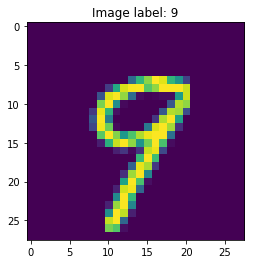

In [29]:
number_to_plot = random.randint(0,X_train.shape[0])
plt.title("Image label: {}".format(y_train[number_to_plot]))
plt.imshow(X_train[number_to_plot])
plt.show()

Initially building a simple fully connected neural network to train on the MNIST dataset.

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2570 - acc: 0.9272
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1127 - acc: 0.9662
Epoch 3/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0773 - acc: 0.9766
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0581 - acc: 0.9819
Epoch 5/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0430 - acc: 0.9870


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_7 (Dense)              multiple                  100480    
_________________________________________________________________
dense_8 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.0812 - acc: 0.9769


[0.08116585892452859, 0.9769]

Building a basic 2 layer fully connected NN that achieves 97.8% accuracy on the test data. 

Adding callback function, which stops training once the model achieves an accuracy of xx.x% on the training data and adding an extra layer to the NN.

In [0]:
class myCallback(tf.keras.callbacks.Callback):  
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.999:
      print("\nYou've exceded an accuracy of 99.9%")
      self.model.stop_training = True  

In [0]:
callbacks = myCallback()

In [0]:
two_layer_network = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [0]:
two_layer_network.compile(optimizer=tf.train.AdamOptimizer(),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [0]:
two_layer_network.fit(X_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1894 - acc: 0.9432
Epoch 2/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0799 - acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0552 - acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0402 - acc: 0.9872
Epoch 5/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.0322 - acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0254 - acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.0228 - acc: 0.9924
Epoch 8/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.0188 - acc: 0.9940
Epoch 9/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0176 - acc: 0.9944
Epoch 10/10
60000/60000 [==============================] - 10s 1

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [0]:
cnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:
cnn_model.fit(X_train, y_train, epochs=15, callbacks=[callbacks])

Epoch 1/15
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.1100 - acc: 0.9652
Epoch 2/15
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0389 - acc: 0.9879
Epoch 3/15
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0252 - acc: 0.9922
Epoch 4/15
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0191 - acc: 0.9939
Epoch 5/15
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0140 - acc: 0.9956
Epoch 6/15
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0122 - acc: 0.9956
Epoch 7/15
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0089 - acc: 0.9970
Epoch 8/15
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0081 - acc: 0.9973
Epoch 9/15
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0077 - acc: 0.9977
Epoch 10/15
60000/60000 [==============================] - 108s 2ms/sampl